In [33]:
# Adaptation of Method 3 from Hale, Higham, and Trefethen, Computing f(A)b by contour integrals. SIAM 2008
import numpy as np
from scipy.special import *


def rational_inverse_square_root_weights_and_poles(interval_min_m, interval_max_M, number_of_rational_terms_N):
    # Computes weights and poles for rational approximation to the inverse square root function:
    #     1/sqrt(z) =approx= w0/(z - p0) + w1/(z - p1) + ... + wN/(z - pN)
    # Approximation designed to be as accurate as possible on the interval [m, M]
    m = interval_min_m
    M = interval_max_M
    N = number_of_rational_terms_N
    k2 = m/M
    Kp = ellipk(1-k2)
    t = 1j * np.arange(0.5, N) * Kp/N
    sn, cn, dn, ph = ellipj(t.imag,1-k2)
    cn = 1./cn
    dn = dn * cn
    sn = 1j * sn * cn
    w = np.sqrt(m) * sn
    dzdt = cn * dn

    poles = (w**2).real
    weights = (2 * Kp * np.sqrt(m) / (np.pi*N)) * dzdt
    rational_function = lambda zz: np.dot(1. / (zz.reshape((-1,1)) - poles), weights)
    return weights, poles, rational_function

# Test

In [32]:
import matplotlib.pyplot as plt

In [25]:
m = 1e-1
M = 1e3
num_test_pts = int(1e5)

In [26]:
zz = np.logspace(np.log10(m), np.log10(M), num_test_pts)
ff = 1. / np.sqrt(zz)

In [27]:
ww1, pp1, rat1 = rational_inverse_square_root_weights_and_poles(m, M, 1)
ff_rat1 = rat1(zz)

ww2, pp2, rat2 = rational_inverse_square_root_weights_and_poles(m, M, 2)
ff_rat2 = rat2(zz)

ww3, pp3, rat3 = rational_inverse_square_root_weights_and_poles(m, M, 3)
ff_rat3 = rat3(zz)

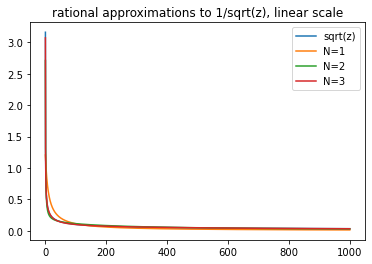

In [29]:
plt.plot(zz, ff)
plt.plot(zz, ff_rat1)
plt.plot(zz, ff_rat2)
plt.plot(zz, ff_rat3)
plt.title('rational approximations to 1/sqrt(z), linear scale')
plt.legend(['sqrt(z)', 'N=1', 'N=2', 'N=3'])

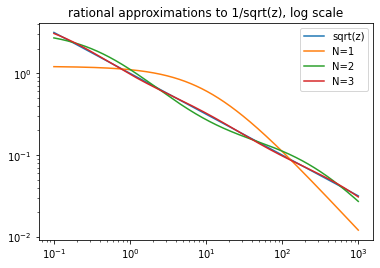

In [30]:
plt.loglog(zz, ff)
plt.loglog(zz, ff_rat1)
plt.loglog(zz, ff_rat2)
plt.loglog(zz, ff_rat3)
plt.title('rational approximations to 1/sqrt(z), log scale')
plt.legend(['sqrt(z)', 'N=1', 'N=2', 'N=3'])

N= 1 , max_err= 1.9560697771229636 , l2_err= 155.83755031160158
N= 2 , max_err= 0.4516625715840945 , l2_err= 31.89849486578146
N= 3 , max_err= 0.08968664732162823 , l2_err= 6.440692656782192
N= 4 , max_err= 0.017371461972527147 , l2_err= 1.2606659740285189
N= 5 , max_err= 0.0033489797118235742 , l2_err= 0.2443648851809592
N= 6 , max_err= 0.0006450582112949022 , l2_err= 0.047211345516944205
N= 7 , max_err= 0.00012422537111422827 , l2_err= 0.009108592192042795
N= 8 , max_err= 2.3922538249010472e-05 , l2_err= 0.0017561276795303663
N= 9 , max_err= 4.606821995878363e-06 , l2_err= 0.00033844929494430823
N= 10 , max_err= 8.871459433734685e-07 , l2_err= 6.521238323217088e-05
N= 11 , max_err= 1.7083962422503873e-07 , l2_err= 1.2563241656080256e-05
N= 12 , max_err= 3.289895733615822e-08 , l2_err= 2.42008046368333e-06
N= 13 , max_err= 6.335425517534077e-09 , l2_err= 4.6615196672434537e-07
N= 14 , max_err= 1.2200271903850535e-09 , l2_err= 8.978491778777019e-08
N= 15 , max_err= 2.3494273193591653e-

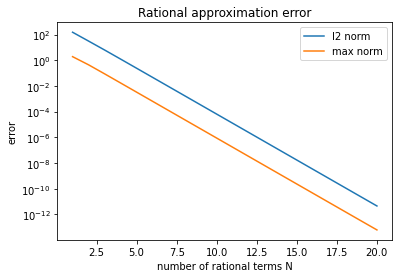

In [37]:
NN = np.arange(1,21)
l2_errs = []
max_errs = []
for N in NN:
    ww, pp, rat = rational_inverse_square_root_weights_and_poles(m, M, N)
    ff_rat = rat(zz)

    max_err = np.max(np.abs(ff - ff_rat))
    l2_err = np.linalg.norm(ff - ff_rat)
    print('N=', N, ', max_err=', max_err, ', l2_err=', l2_err)
    
    max_errs.append(max_err)
    l2_errs.append(l2_err)
    
plt.semilogy(NN, l2_errs)
plt.semilogy(NN, max_errs)
plt.title('Rational approximation error')
plt.xlabel('number of rational terms N')
plt.ylabel('error')
plt.legend(['l2 norm', 'max norm'])